In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
from random_matrix import generate_matrix

In [16]:
input_data = generate_matrix(5)
print(input_data)

[[1, 4, 3, 5, 2], [1, 3, 5, 2, 4], [4, 5, 1, 2, 3], [3, 5, 1, 4, 2], [2, 1, 4, 5, 3]]


In [2]:
def calculate_cost(matrix, assignment):
    cost = 0
    for worker, job in enumerate(assignment):
        cost += matrix[worker][job]
    return cost

# the result should be 
# worker 0, 1, 2, 3
#       [1, 0, 2, 3] jobs
# optimal cost = 13

In [6]:
# Prototype 1 
# the Iteration is not right should be n!
# and the new child can be added if the cost of unfinished assignment is less than the least cost 
# Should it add all child?
# Yes it should, But we can optimize this algo by cut/terminate the unfinished one that has cost more than the finished one or the least cost. We do this in line 32/33
def find_least_cost(cost_matrix):
    worker_length = len(cost_matrix)
    least_cost = float('inf') # Initialize with positive infinity
    assignment_result = []

    iteration = 0;

    # Initialize stack for nodes explore
    stack = [(0, [], list(range(worker_length)))] 
    
    while stack:
        # cost, list of assigned worker, list of unassigned worker
        cost, assignment, unassigned = stack.pop() # pop a node to explore

        if not unassigned: # Check if all worker are assigned
            if cost < least_cost:
                least_cost = cost # set new cost
                assignment_result = assignment # set new assignment
            continue

        # create child node for each unassigned worker
        for job in unassigned:
            new_assignment = assignment + [job] # add job to assignment
            new_unassigned = [j for j in unassigned if j != job] # <- this is constraint
            new_cost = calculate_cost(cost_matrix, new_assignment)

            if new_cost < least_cost:
                stack.append((new_cost, new_assignment, new_unassigned))  
        iteration += 1
    print(f"{iteration} Iterations")

    return least_cost, assignment_result

In [28]:
# Prototype 2 
# Try add all childs instead of the lower cost one
# and count the iteration once all workers are assigned 
# But this took too much time to solve the iteration is correct(equals to n!)
# this prototype compare all combination of assignmnet result then choose the one with lowest cost
def find_least_cost(cost_matrix):
    worker_length = len(cost_matrix)
    least_cost = float('inf') # Initialize with positive infinity
    assignment_result = []

    iteration = 0;

    # Initialize stack for nodes explore
    stack = [(0, [], list(range(worker_length)))] 
    
    while stack:
        # cost, list of assigned worker, list of unassigned worker
        cost, assignment, unassigned = stack.pop() # pop a node to explore

        if not unassigned: # Check if all worker are assigned
            iteration += 1 # All workers are assigned means we finished 1 iteration
            if cost < least_cost:
                least_cost = cost # set new cost
                assignment_result = assignment # set new assignment
            continue

        # create child node for each unassigned worker
        for job in unassigned:
            new_assignment = assignment + [job] # add job to assignment
            new_unassigned = [j for j in unassigned if j != job] # <- this is constraint (1 worker can assigned to 1 job)
            new_cost = calculate_cost(cost_matrix, new_assignment)
            stack.append((new_cost, new_assignment, new_unassigned))  

    print(f"{iteration} Iterations")

    return least_cost, assignment_result

In [3]:
# Prototype 3
# we use the prototype 1 as reference that cut the unfinished one with more cost
# and count the iteratoin once all workers are assigned  
def find_least_cost(cost_matrix):
    worker_length = len(cost_matrix)
    least_cost = float('inf') # Initialize with positive infinity
    assignment_result = []

    iteration = 0;

    # Initialize stack for nodes explore
    stack = [(0, [], list(range(worker_length)))] 
    
    while stack:
        # cost, list of assigned worker, list of unassigned worker
        cost, assignment, unassigned = stack.pop() # pop a node to explore

        if not unassigned: # Check if all worker are assigned
            iteration += 1 # All workers are assigned means we finished 1 iteration
            if cost < least_cost:
                least_cost = cost # set new cost
                assignment_result = assignment # set new assignment
            continue

        # create child node for each unassigned worker
        for job in unassigned:
            new_assignment = assignment + [job] # add job to assignment
            new_unassigned = [j for j in unassigned if j != job] # <- this is constraint (1 worker can assigned to 1 job)
            new_cost = calculate_cost(cost_matrix, new_assignment)

            if new_cost < least_cost:
                stack.append((new_cost, new_assignment, new_unassigned))  

    print(f"{iteration} Iterations")

    return least_cost, assignment_result

In [17]:
# Prototype 4
# Added combinations and iterations 
# Once all worker are assigned and unassigned list is empty then this means we get a combination
def find_least_cost(cost_matrix):
    worker_length = len(cost_matrix)
    least_cost = float('inf') # Initialize with positive infinity
    assignment_result = []

    iteration = 0;
    combination = 0;

    # Initialize stack for nodes explore
    stack = [(0, [], list(range(worker_length)))] 
    
    while stack:
        # cost, list of assigned worker, list of unassigned worker
        cost, assignment, unassigned = stack.pop() # pop a node to explore
        iteration += 1

        if not unassigned: # Check if all worker are assigned
            combination += 1 # All workers are assigned means we finished 1 combination
            if cost < least_cost:
                least_cost = cost # set new cost
                assignment_result = assignment # set new assignment
            continue

        # create child node for each unassigned worker
        for job in unassigned:
            new_assignment = assignment + [job] # add job to assignment
            new_unassigned = [j for j in unassigned if j != job] # <- this is constraint (1 worker can assigned to 1 job)
            new_cost = calculate_cost(cost_matrix, new_assignment)

            if new_cost < least_cost:
                stack.append((new_cost, new_assignment, new_unassigned))  

    print(f"{iteration} Iterations though {combination} combinations")

    return least_cost, assignment_result

In [18]:
# dummy input
# output should be
# worker 0 -> job 1
# worker 1 -> job 0
# worker 2 -> job 2
# worker 3 -> job 3
# optimal cost = 13
input_data = np.array([
#job 0, 1, 2, 3 
    [9, 2, 7, 8], # Worker 0
    [6, 4, 3, 7], # Worker 1
    [5, 8, 1, 8], # Worker 2
    [7, 6, 9, 4]  # Worker 3
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

34 Iterations though 6 combinations
Optimal Solution: 13
Optimal Assignment: [1, 0, 2, 3]
Time Took : 0.0 s


In [20]:
# 10x10
input_data = np.array([
    [9, 7, 6, 4, 3, 8, 5, 2, 1, 4],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9],
    [8, 6, 4, 2, 1, 7, 9, 3, 5, 7],
    [9, 7, 5, 3, 2, 8, 6, 4, 1, 5],
    [1, 3, 2, 5, 4, 6, 9, 8, 7, 3],
    [4, 6, 8, 9, 7, 1, 3, 2, 5, 8],
    [5, 7, 9, 1, 8, 3, 2, 4, 6, 2],
    [6, 8, 2, 3, 9, 5, 1, 7, 4, 1]
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

17302 Iterations though 21 combinations
Optimal Solution: 18
Optimal Assignment: [7, 4, 1, 0, 3, 8, 2, 5, 9, 6]
Time Took : 0.11604094505310059 s


In [14]:
# 15x15
input_data = np.array([
    [9, 7, 6, 4, 3, 8, 5, 2, 1, 4, 7, 6, 8, 2, 1],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9, 5, 1, 3, 7, 2],
    [8, 6, 4, 2, 1, 7, 9, 3, 5, 7, 6, 8, 2, 9, 4],
    [9, 7, 5, 3, 2, 8, 6, 4, 1, 5, 4, 6, 7, 9, 2],
    [1, 3, 2, 5, 4, 6, 9, 8, 7, 3, 2, 8, 9, 5, 4],
    [4, 6, 8, 9, 7, 1, 3, 2, 5, 8, 9, 7, 6, 4, 3],
    [5, 7, 9, 1, 8, 3, 2, 4, 6, 2, 1, 4, 3, 5, 9],
    [6, 8, 2, 3, 9, 5, 1, 7, 4, 1, 6, 3, 5, 8, 7],
    [7, 9, 1, 2, 3, 6, 4, 8, 5, 7, 4, 5, 2, 1, 8],
    [8, 2, 6, 4, 5, 9, 1, 3, 7, 9, 8, 2, 1, 7, 5],
    [5, 4, 7, 3, 2, 6, 8, 9, 1, 4, 5, 1, 9, 8, 6],
    [1, 2, 3, 6, 9, 5, 4, 7, 8, 7, 1, 3, 6, 2, 9],
    [6, 8, 9, 2, 4, 1, 7, 5, 3, 3, 6, 7, 8, 9, 4]
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

1341021 Iterations though 31 combinations
Optimal Solution: 20
Optimal Assignment: [14, 12, 8, 0, 4, 3, 2, 7, 10, 9, 13, 6, 11, 1, 5]
Time Took : 17.09347105026245 s


In [ ]:
# 16x16
input_data = np.array([
    [9, 7, 6, 4, 3, 8, 5, 2, 1, 4, 7, 6, 8, 2, 1, 3],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5, 2],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9, 5, 1, 3, 7, 2, 4],
    [8, 6, 4, 2, 1, 7, 9, 3, 5, 7, 6, 8, 2, 9, 4, 1],
    [9, 7, 5, 3, 2, 8, 6, 4, 1, 5, 4, 6, 7, 9, 2, 3],
    [1, 3, 2, 5, 4, 6, 9, 8, 7, 3, 2, 8, 9, 5, 4, 6],
    [4, 6, 8, 9, 7, 1, 3, 2, 5, 8, 9, 7, 6, 4, 3, 1],
    [5, 7, 9, 1, 8, 3, 2, 4, 6, 2, 1, 4, 3, 5, 9, 8],
    [6, 8, 2, 3, 9, 5, 1, 7, 4, 1, 6, 3, 5, 8, 7, 9],
    [7, 9, 1, 2, 3, 6, 4, 8, 5, 7, 4, 5, 2, 1, 8, 6],
    [8, 2, 6, 4, 5, 9, 1, 3, 7, 9, 8, 2, 1, 7, 5, 3],
    [5, 4, 7, 3, 2, 6, 8, 9, 1, 4, 5, 1, 9, 8, 6, 2],
    [1, 2, 3, 6, 9, 5, 4, 7, 8, 7, 1, 3, 6, 2, 9, 5],
    [6, 8, 9, 2, 4, 1, 7, 5, 3, 3, 6, 7, 8, 9, 4, 1],
    [7, 1, 4, 5, 8, 2, 3, 6, 9, 2, 9, 4, 5, 1, 3, 8]
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

In [ ]:
# 17x17
input_data = np.array([
    [9, 7, 6, 4, 3, 8, 5, 2, 1, 4, 7, 6, 8, 2, 1, 3, 5],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6, 4],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5, 2, 3],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9, 5, 1, 3, 7, 2, 4, 1],
    [8, 6, 4, 2, 1, 7, 9, 3, 5, 7, 6, 8, 2, 9, 4, 1, 8],
    [9, 7, 5, 3, 2, 8, 6, 4, 1, 5, 4, 6, 7, 9, 2, 3, 7],
    [1, 3, 2, 5, 4, 6, 9, 8, 7, 3, 2, 8, 9, 5, 4, 6, 1],
    [4, 6, 8, 9, 7, 1, 3, 2, 5, 8, 9, 7, 6, 4, 3, 1, 5],
    [5, 7, 9, 1, 8, 3, 2, 4, 6, 2, 1, 4, 3, 5, 9, 8, 2],
    [6, 8, 2, 3, 9, 5, 1, 7, 4, 1, 6, 3, 5, 8, 7, 9, 4],
    [7, 9, 1, 2, 3, 6, 4, 8, 5, 7, 4, 5, 2, 1, 8, 6, 3],
    [8, 2, 6, 4, 5, 9, 1, 3, 7, 9, 8, 2, 1, 7, 5, 3, 9],
    [5, 4, 7, 3, 2, 6, 8, 9, 1, 4, 5, 1, 9, 8, 6, 2, 4],
    [1, 2, 3, 6, 9, 5, 4, 7, 8, 7, 1, 3, 6, 2, 9, 5, 6],
    [6, 8, 9, 2, 4, 1, 7, 5, 3, 3, 6, 7, 8, 9, 4, 1, 7],
    [7, 1, 4, 5, 8, 2, 3, 6, 9, 2, 9, 4, 5, 1, 3, 8, 2],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6, 4]
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

In [ ]:
# 18x18
input_data = np.array([
    [9, 7, 6, 4, 3, 8, 5, 2, 1, 4, 7, 6, 8, 2, 1, 3, 5, 9],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6, 4, 8],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5, 2, 3, 1],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9, 5, 1, 3, 7, 2, 4, 1, 3],
    [8, 6, 4, 2, 1, 7, 9, 3, 5, 7, 6, 8, 2, 9, 4, 1, 8, 6],
    [9, 7, 5, 3, 2, 8, 6, 4, 1, 5, 4, 6, 7, 9, 2, 3, 7, 5],
    [1, 3, 2, 5, 4, 6, 9, 8, 7, 3, 2, 8, 9, 5, 4, 6, 1, 2],
    [4, 6, 8, 9, 7, 1, 3, 2, 5, 8, 9, 7, 6, 4, 3, 1, 5, 7],
    [5, 7, 9, 1, 8, 3, 2, 4, 6, 2, 1, 4, 3, 5, 9, 8, 2, 4],
    [6, 8, 2, 3, 9, 5, 1, 7, 4, 1, 6, 3, 5, 8, 7, 9, 4, 6],
    [7, 9, 1, 2, 3, 6, 4, 8, 5, 7, 4, 5, 2, 1, 8, 6, 3, 1],
    [8, 2, 6, 4, 5, 9, 1, 3, 7, 9, 8, 2, 1, 7, 5, 3, 9, 2],
    [5, 4, 7, 3, 2, 6, 8, 9, 1, 4, 5, 1, 9, 8, 6, 2, 4, 3],
    [1, 2, 3, 6, 9, 5, 4, 7, 8, 7, 1, 3, 6, 2, 9, 5, 6, 1],
    [6, 8, 9, 2, 4, 1, 7, 5, 3, 3, 6, 7, 8, 9, 4, 1, 7, 8],
    [7, 1, 4, 5, 8, 2, 3, 6, 9, 2, 9, 4, 5, 1, 3, 8, 2, 9],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6, 4, 5],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5, 2, 3, 6]
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

In [ ]:
# 19x19
input_data = np.array([
    [9, 7, 6, 4, 3, 8, 5, 2, 1, 4, 7, 6, 8, 2, 1, 3, 5, 9, 4],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6, 4, 8, 1],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5, 2, 3, 1, 3],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9, 5, 1, 3, 7, 2, 4, 1, 3, 9],
    [8, 6, 4, 2, 1, 7, 9, 3, 5, 7, 6, 8, 2, 9, 4, 1, 8, 6, 7],
    [9, 7, 5, 3, 2, 8, 6, 4, 1, 5, 4, 6, 7, 9, 2, 3, 7, 5, 8],
    [1, 3, 2, 5, 4, 6, 9, 8, 7, 3, 2, 8, 9, 5, 4, 6, 1, 2, 4],
    [4, 6, 8, 9, 7, 1, 3, 2, 5, 8, 9, 7, 6, 4, 3, 1, 5, 7, 6],
    [5, 7, 9, 1, 8, 3, 2, 4, 6, 2, 1, 4, 3, 5, 9, 8, 2, 4, 5],
    [6, 8, 2, 3, 9, 5, 1, 7, 4, 1, 6, 3, 5, 8, 7, 9, 4, 6, 2],
    [7, 9, 1, 2, 3, 6, 4, 8, 5, 7, 4, 5, 2, 1, 8, 6, 3, 1, 9],
    [8, 2, 6, 4, 5, 9, 1, 3, 7, 9, 8, 2, 1, 7, 5, 3, 9, 2, 8],
    [5, 4, 7, 3, 2, 6, 8, 9, 1, 4, 5, 1, 9, 8, 6, 2, 4, 3, 7],
    [1, 2, 3, 6, 9, 5, 4, 7, 8, 7, 1, 3, 6, 2, 9, 5, 6, 1, 4],
    [6, 8, 9, 2, 4, 1, 7, 5, 3, 3, 6, 7, 8, 9, 4, 1, 7, 8, 5],
    [7, 1, 4, 5, 8, 2, 3, 6, 9, 2, 9, 4, 5, 1, 3, 8, 2, 9, 6],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6, 4, 5, 3],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5, 2, 3, 1, 2]
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

In [ ]:
# 20x20
input_data = np.array([
    [9, 7, 6, 4, 3, 8, 5, 2, 1, 4, 7, 6, 8, 2, 1, 3, 5, 9, 4, 3],
    [2, 4, 6, 8, 1, 3, 5, 7, 9, 5, 3, 2, 1, 9, 7, 6, 4, 8, 1, 5],
    [3, 5, 7, 9, 2, 4, 6, 8, 1, 6, 8, 9, 7, 4, 5, 2, 3, 1, 3, 9],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9, 5, 1, 3, 7, 2, 6, 4, 8, 2, 6],
    [8, 6, 4, 2, 1, 7, 9, 3, 5, 7, 6, 8, 2, 9, 4, 1, 5, 3, 7, 1],
    [9, 7, 5, 3, 2, 8, 6, 4, 1, 5, 4, 6, 7, 9, 2, 3, 8, 1, 9, 2],
    [1, 3, 2, 5, 4, 6, 9, 8, 7, 3, 2, 8, 9, 5, 4, 1, 7, 6, 5, 7],
    [4, 6, 8, 9, 7, 1, 3, 2, 5, 8, 9, 7, 6, 4, 3, 2, 1, 5, 6, 1],
    [5, 7, 9, 1, 8, 3, 2, 4, 6, 2, 1, 4, 3, 5, 9, 8, 6, 7, 2, 4],
    [6, 8, 2, 3, 9, 5, 1, 7, 4, 1, 6, 3, 5, 8, 7, 9, 2, 4, 1, 7],
    [7, 9, 1, 2, 3, 6, 4, 8, 5, 7, 4, 5, 2, 1, 8, 9, 3, 6, 5, 8],
    [8, 2, 6, 4, 5, 9, 1, 3, 7, 9, 8, 2, 1, 7, 5, 4, 6, 3, 6, 7],
    [5, 4, 7, 3, 2, 6, 8, 9, 1, 4, 5, 1, 9, 8, 6, 2, 7, 3, 5, 1],
    [1, 2, 3, 6, 9, 5, 4, 7, 8, 7, 1, 3, 6, 2, 9, 5, 8, 4, 7, 6],
    [6, 8, 9, 2, 4, 1, 7, 5, 3, 3, 6, 7, 8, 9, 4, 1, 5, 2, 2, 9],
    [7, 1, 4, 5, 8, 2, 3, 6, 9, 2, 9, 4, 5, 1, 3, 7, 6, 8, 9, 3],
    [3, 5, 6, 9, 1, 7, 8, 4, 2, 6, 3, 8, 9, 7, 1, 5, 4, 2, 1, 8],
    [4, 7, 9, 1, 2, 3, 5, 6, 8, 5, 4, 9, 1, 2, 6, 7, 3, 8, 4, 5],
    [2, 6, 8, 3, 5, 4, 7, 9, 1, 8, 2, 6, 4, 3, 5, 9, 1, 7, 1, 2],
    [1, 3, 5, 7, 9, 2, 4, 6, 8, 9, 5, 1, 3, 7, 2, 6, 4, 8, 2, 6]
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

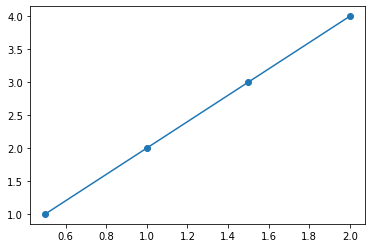

In [25]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(list(i/2 for i in range(1,5)), [1,2,3,4], marker='o')
plt.show()